In [50]:
import pandas as pd

# CSVファイルの読み込み
apartment_for_rent_classified = pd.read_csv('data/apartment_for_rent_classified.csv')
us_states_abbreviation_with_capitals = pd.read_csv('data/us_states_abbreviation_with_capitals.csv')

C:\Users\U004773\AppData\Local\Temp\ipykernel_26372\2298210099.py:4: DtypeWarning: Columns (4,5,11,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  apartment_for_rent_classified = pd.read_csv('data/apartment_for_rent_classified.csv')


In [51]:
print('apartment_for_rent_classified -----')
display(apartment_for_rent_classified.info())
print('us_states_abbreviation_with_capitals -----')
display(us_states_abbreviation_with_capitals.info())

apartment_for_rent_classified -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99826 non-null  object 
 1   title          99826 non-null  object 
 2   body           99826 non-null  object 
 3   amenities      83749 non-null  object 
 4   bathrooms      99760 non-null  object 
 5   bedrooms       99699 non-null  object 
 6   currency       99822 non-null  object 
 7   fee            99823 non-null  object 
 8   has_photo      99823 non-null  object 
 9   pets_allowed   39192 non-null  object 
 10  price          99821 non-null  float64
 11  price_display  99820 non-null  object 
 12  price_type     99823 non-null  object 
 13  square_feet    99823 non-null  object 
 14  address        7946 non-null   object 
 15  cityname       99521 non-null  object 
 16  state          99521 non-null  object 
 17  latitude      

None

us_states_abbreviation_with_capitals -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state_name  50 non-null     object 
 1   state       50 non-null     object 
 2   capital     50 non-null     object 
 3   latitude    50 non-null     float64
 4   longitude   50 non-null     float64
dtypes: float64(2), object(3)
memory usage: 2.1+ KB


None

In [67]:
df = apartment_for_rent_classified.copy()

In [68]:
col_name = 'pets_allowed'
df[col_name].value_counts()

pets_allowed
Cats,Dogs         37213
Cats               1848
Dogs                127
Monthly               2
823                   1
Cats,Dogs,None        1
Name: count, dtype: int64

In [69]:
df = df[(df[col_name] != '823') & (df[col_name] != 'Monthly')]
df[col_name].value_counts()

pets_allowed
Cats,Dogs         37213
Cats               1848
Dogs                127
Cats,Dogs,None        1
Name: count, dtype: int64

In [70]:
col_name = 'price_type'
df[col_name].value_counts()

price_type
Monthly           99816
Weekly                3
Monthly|Weekly        1
Name: count, dtype: int64

In [71]:
df = df[df[col_name] == 'Monthly']
df[col_name].value_counts()

price_type
Monthly    99816
Name: count, dtype: int64

In [72]:
df['price'] = df['price'].fillna(0)
df = df[df['price'] > 0]

In [73]:
df['square_feet'] = df['square_feet'].astype(float)

df['bedrooms'] = df['bedrooms'].fillna(0)
df['bedrooms'] = df['bedrooms'].astype(int)

df['bathrooms'] = df['bathrooms'].fillna(0)
df['bathrooms'] = df['bathrooms'].astype(float)

df.describe()

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,99815.000000,99815.000000,99815.000000,99815.000000,99790.000000,99790.000000,9.981500e+04
mean,1.444407,1.725843,1527.173160,956.388459,36.950188,-91.562891,1.559689e+09
std,0.547858,0.750903,903.375444,417.144252,4.599533,15.819346,1.104466e+07
min,0.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,1.000000,1.000000,1014.000000,729.000000,33.749600,-104.791900,1.550832e+09
50%,1.000000,2.000000,1350.000000,900.000000,37.229700,-84.562300,1.568745e+09
75%,2.000000,2.000000,1795.000000,1115.000000,39.953900,-77.585300,1.568767e+09
max,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800,1.577391e+09


In [78]:
df[['state', 'price', 'square_feet']].to_csv('data/cleansed_apartment_data.csv', index=False)

In [79]:
df = pd.read_csv('data/cleansed_apartment_data.csv')
df

,state,price,square_feet
0,CA,2195.0,542.0
1,VA,1250.0,1500.0
2,NC,1395.0,1650.0
3,CA,1600.0,820.0
4,NM,975.0,624.0
...,...,...,...
99810,TX,780.0,605.0
99811,FL,813.0,921.0
99812,CA,1325.0,650.0
99813,NC,931.0,701.0


In [85]:
df_mean = df.groupby('state').mean().reset_index()
df_mean = df_mean.rename(columns={'price': 'price_mean', 'square_feet': 'square_feet_mean'})
df_mean

,state,price_mean,square_feet_mean
0,AK,1050.758621,793.120690
1,AL,959.802260,1037.025424
2,AR,874.367893,971.740803
3,AZ,1119.574664,912.646393
4,CA,2463.772749,925.662605
5,CO,1554.382049,893.902780
6,CT,1264.516505,906.691262
7,DC,2112.139785,677.419355
8,DE,1154.857143,1035.714286
9,FL,1573.535430,1043.477878


In [89]:
df_mean['price_per_sf'] = df_mean['price_mean'] / df_mean['square_feet_mean']
df_mean

,state,price_mean,square_feet_mean,price_per_sf
0,AK,1050.758621,793.120690,1.324841
1,AL,959.802260,1037.025424,0.925534
2,AR,874.367893,971.740803,0.899795
3,AZ,1119.574664,912.646393,1.226734
4,CA,2463.772749,925.662605,2.661632
5,CO,1554.382049,893.902780,1.738871
6,CT,1264.516505,906.691262,1.394649
7,DC,2112.139785,677.419355,3.117921
8,DE,1154.857143,1035.714286,1.115034
9,FL,1573.535430,1043.477878,1.507972


In [90]:
df_count = df[['state', 'price']].groupby('state').count().reset_index()
df_count = df_count.rename(columns={'price': 'count',})
df_count

,state,count
0,AK,58
1,AL,354
2,AR,598
3,AZ,2384
4,CA,10341
5,CO,6295
6,CT,515
7,DC,93
8,DE,7
9,FL,5786


In [93]:
df_stats = df_count.merge(df_mean, on='state')
df_stats

,state,count,price_mean,square_feet_mean,price_per_sf
0,AK,58,1050.758621,793.120690,1.324841
1,AL,354,959.802260,1037.025424,0.925534
2,AR,598,874.367893,971.740803,0.899795
3,AZ,2384,1119.574664,912.646393,1.226734
4,CA,10341,2463.772749,925.662605,2.661632
5,CO,6295,1554.382049,893.902780,1.738871
6,CT,515,1264.516505,906.691262,1.394649
7,DC,93,2112.139785,677.419355,3.117921
8,DE,7,1154.857143,1035.714286,1.115034
9,FL,5786,1573.535430,1043.477878,1.507972


In [97]:
df_stats = df_stats.merge(us_states_abbreviation_with_capitals)

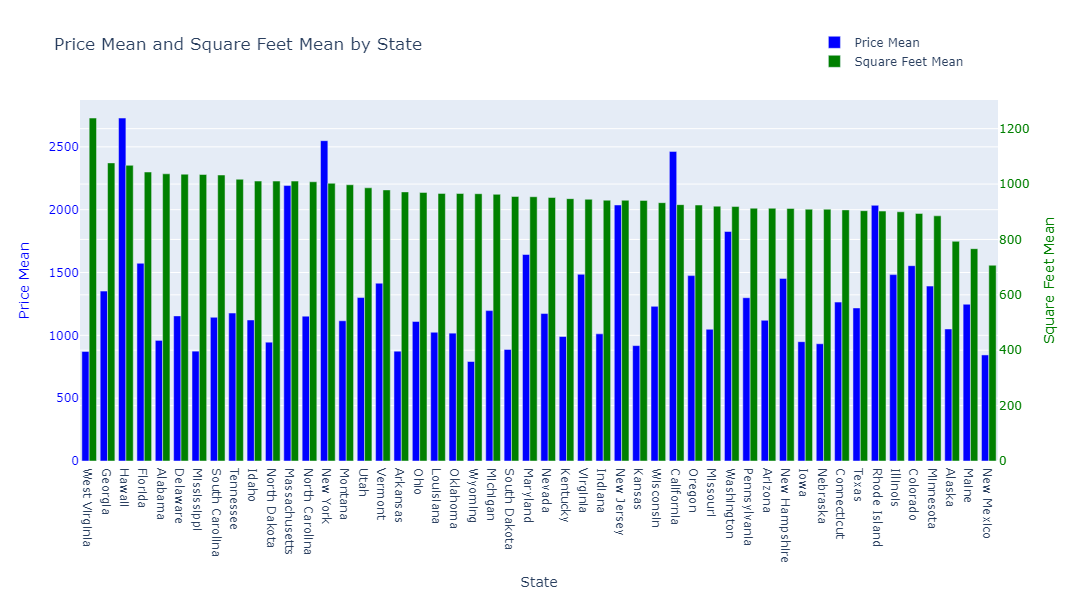

In [105]:
import plotly.graph_objects as go

df_stats = df_stats.sort_values(by='square_feet_mean', ascending=False)

# 棒グラフの作成
fig = go.Figure()

# price_meanの棒グラフ (左辺)
fig.add_trace(go.Bar(
    x=df_stats['state_name'],
    y=df_stats['price_mean'],
    name='Price Mean',
    yaxis='y1',
    offsetgroup=1,
    marker_color='blue'
))

# square_feet_meanの棒グラフ (右辺)
fig.add_trace(go.Bar(
    x=df_stats['state_name'],
    y=df_stats['square_feet_mean'],
    name='Square Feet Mean',
    yaxis='y2',
    offsetgroup=2,
    marker_color='green'
))

# レイアウト設定
fig.update_layout(
    title="Price Mean and Square Feet Mean by State",
    xaxis_title="State",
    yaxis=dict(
        title="Price Mean",
        titlefont=dict(color="blue"),
        tickfont=dict(color="blue"),
        side="left"
    ),
    yaxis2=dict(
        title="Square Feet Mean",
        titlefont=dict(color="green"),
        tickfont=dict(color="green"),
        overlaying="y",
        side="right"
    ),
    legend=dict(x=0.8, y=1.2),
    barmode='group',  # グループとして表示
    bargap=0.2,        # 棒グラフ同士の間隔を広げる
    width=1000,  # 横幅
    height=600,  # 高さ
)

# グラフ表示
fig.show()

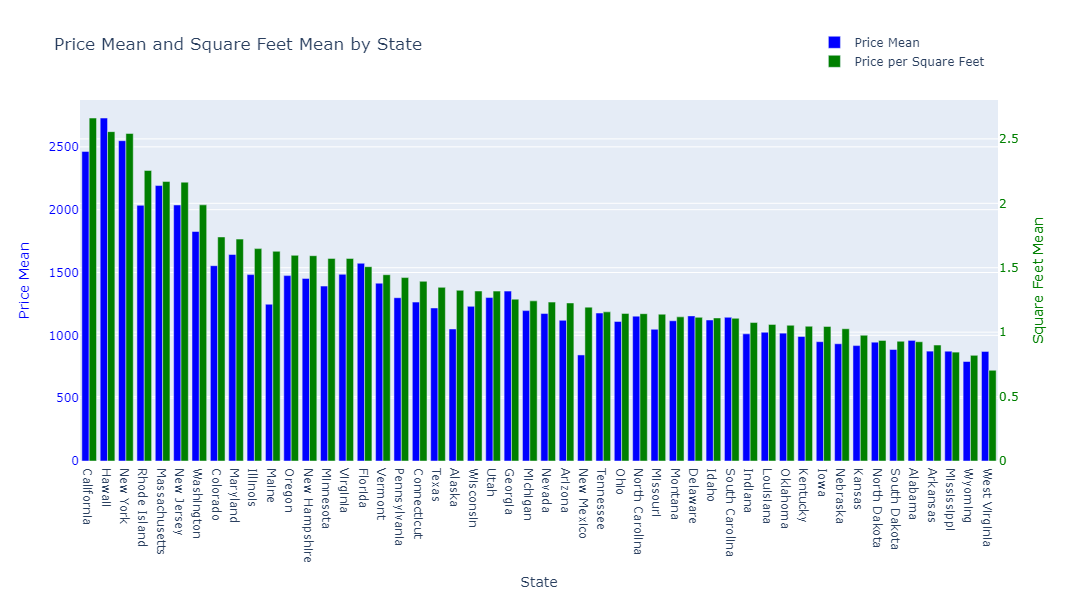

In [108]:
import plotly.graph_objects as go

df_stats = df_stats.sort_values(by='price_per_sf', ascending=False)

# 棒グラフの作成
fig = go.Figure()

# price_meanの棒グラフ (左辺)
fig.add_trace(go.Bar(
    x=df_stats['state_name'],
    y=df_stats['price_mean'],
    name='Price Mean',
    yaxis='y1',
    offsetgroup=1,
    marker_color='blue'
))

# square_feet_meanの棒グラフ (右辺)
fig.add_trace(go.Bar(
    x=df_stats['state_name'],
    y=df_stats['price_per_sf'],
    name='Price per Square Feet',
    yaxis='y2',
    offsetgroup=2,
    marker_color='green'
))

# レイアウト設定
fig.update_layout(
    title="Price Mean and Square Feet Mean by State",
    xaxis_title="State",
    yaxis=dict(
        title="Price Mean",
        titlefont=dict(color="blue"),
        tickfont=dict(color="blue"),
        side="left"
    ),
    yaxis2=dict(
        title="Square Feet Mean",
        titlefont=dict(color="green"),
        tickfont=dict(color="green"),
        overlaying="y",
        side="right"
    ),
    legend=dict(x=0.8, y=1.2),
    barmode='group',  # グループとして表示
    bargap=0.2,        # 棒グラフ同士の間隔を広げる
    width=1000,  # 横幅
    height=600,  # 高さ
)

# グラフ表示
fig.show()

In [109]:
df_stats

,state,count,price_mean,square_feet_mean,price_per_sf,state_name,capital,latitude,longitude
4,CA,10341,2463.772749,925.662605,2.661632,California,Sacramento,38.581572,-121.494400
10,HI,31,2729.193548,1067.677419,2.556197,Hawaii,Honolulu,21.306944,-157.858333
33,NY,657,2549.112633,1002.818874,2.541947,New York,Albany,42.652579,-73.756232
38,RI,119,2034.731092,902.386555,2.254833,Rhode Island,Providence,41.823989,-71.412834
18,MA,5041,2192.051577,1010.668915,2.168912,Massachusetts,Boston,42.360082,-71.058880
30,NJ,4497,2037.430509,941.486547,2.164057,New Jersey,Trenton,40.217053,-74.742938
46,WA,2619,1826.373807,918.724704,1.987945,Washington,Olympia,47.037874,-122.900695
5,CO,6295,1554.382049,893.902780,1.738871,Colorado,Denver,39.739236,-104.990251
19,MD,5309,1643.279149,954.261066,1.722044,Maryland,Annapolis,38.978445,-76.492183
13,IL,1036,1483.243243,899.890927,1.648248,Illinois,Springfield,39.781721,-89.650148


In [114]:
import folium
import pandas as pd

# マップの初期位置を設定（最初のデータポイントを利用）
map_center = [df_stats['latitude'].mean(), df_stats['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=5)

# データフレームの各行に基づいて円を描画
for _, row in df_stats.iterrows():
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=row['price_mean']*50,  # 円の大きさはprice_meanに比例
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"State: {row['state_name']}, Price Mean: {row['price_mean']}"
    ).add_to(mymap)

# マップを表示
mymap
